In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression,SGDRegressor

# <div align='center'> **LINEAR** **REGRESSION** </div>

## **1**. **Normal** **Equation**

In [2]:
#generate some linear looking data
X=2*np.random.rand(100,1)
y=4+3*X +np.random.rand(100,1)

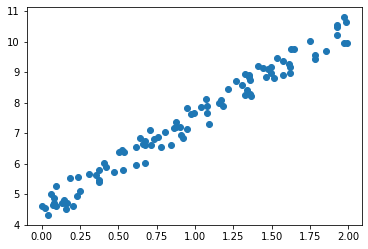

In [3]:
#plot X and y
plt.scatter(X,y)
plt.show()

In [4]:
#add ones for x0 to X
X_b=np.c_[np.ones(list(X.shape)),X]

#find value of theta vector
best_theta=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(best_theta)

[[4.51931053]
 [3.00384685]]


In [5]:
#make new X set to make predictions
X_new=np.array([[0],[2]])
#add x0
X_new_b=np.c_[np.ones(list(X_new.shape)),X_new]
#make prediction
y_predict=X_new_b.dot(best_theta) #it returns a scalar value for each prediction

# y_predict=(best_theta.T)*X_new_b  #it returns the matrix rather than scalar value for each prediction
print(y_predict)

[[ 4.51931053]
 [10.52700424]]


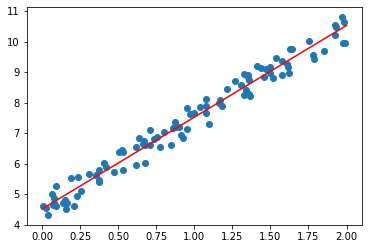

In [6]:
#plot the model's prediction
plt.plot(X_new,y_predict,'r-')
plt.scatter(X,y)
plt.show()

In [7]:
#using scikit learn
lin_reg=LinearRegression()
lin_reg.fit(X,y)

print(lin_reg.intercept_,lin_reg.coef_)

print(lin_reg.predict(X_new))

[4.51931053] [[3.00384685]]
[[ 4.51931053]
 [10.52700424]]


In [8]:
#scikit learn's linear regression class is based on:
best_theta_by_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6)
best_theta_by_svd

array([[4.51931053],
       [3.00384685]])

## **2**. **Gradient** **Descent**

#### **a**. **Batch** **Gradient** **Descent**

In [11]:
eta=0.1
iterations=1000
m=100

#randomly initialize the theta
theta=np.random.randn(2,1)

#to find the best theta by batch gradient descent
for i in range(iterations):
  gradients=(2/m)*X_b.T.dot(X_b.dot(theta)-y)
  theta=theta-eta*gradients
print(theta)

[[4.51931053]
 [3.00384685]]


#### **a**. **Stochastic** **Gradient** **Descent**

In [13]:
epochs=50
t0,t1=5,50   #learning schedule parameters

def learning_schedule(t):
  return t0/(t+t1)

theta=np.random.randn(2,1) #random initialization of parameters theta

for epoch in range(epochs):
  for i in range(m):
    random_index=np.random.randint(m)  #returns a single random integer from 0 to m
    xi=X_b[random_index:random_index+1]
    yi=y[random_index:random_index+1]
    gradients=2*xi.T.dot(xi.dot(theta)-yi)  
    eta=learning_schedule(epoch*m+1)  # eta from learning schedule to minimize gradually
    theta=theta-eta*gradients

print(theta)

[[4.52743306]
 [2.99579219]]


In [20]:
#using scikit learn

sgd_reg=SGDRegressor(penalty=None,max_iter=1000,tol=0.001,eta0=0.1)
sgd_reg.fit(X,y.ravel())  #.ravel() changes to make y flattened to a single row   |  we don't have to add x0, scikit learn does itself

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [19]:
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[4.49000914]
[3.02043276]
